In [16]:
import matplotlib.pyplot as plt
import json
import numpy as np


In [11]:
def pace_from_velocity(v_mps: float) -> float:
    if v_mps == 0:
        return 0
    return (1000 / v_mps) / 60  # 분/km

In [30]:
with open("distance_stream.json" , "r") as f: 
    data = json.load(f)


In [31]:
data['result'].keys()

dict_keys(['heartrate', 'watts', 'cadence', 'distance', 'velocity_smooth', 'time'])

In [32]:
data['result']['pace'] = {
    'data': [pace_from_velocity(s) if s != 0 else 0 for s in data['result']['velocity_smooth']['data']],
    'series_type': 'distance',
    'original_size': len(data['result']['velocity_smooth']['data']),
    'resolution': 'high'
}

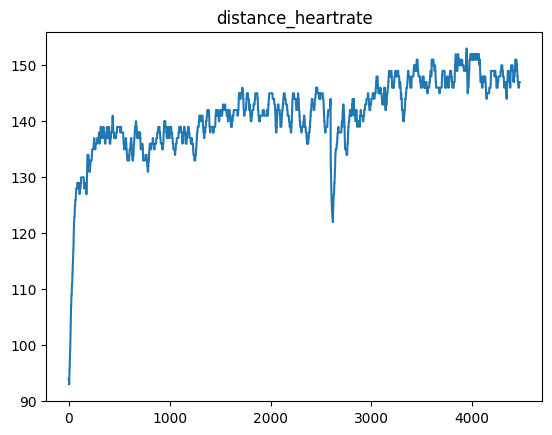

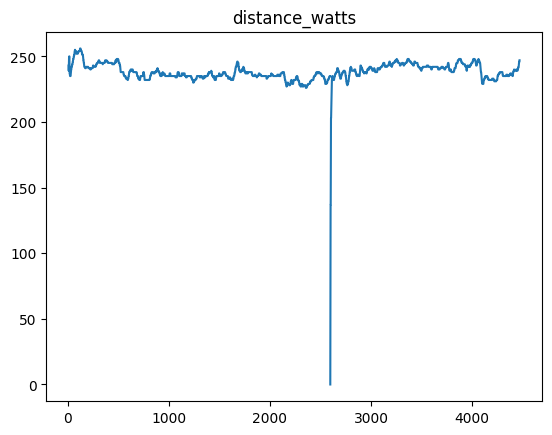

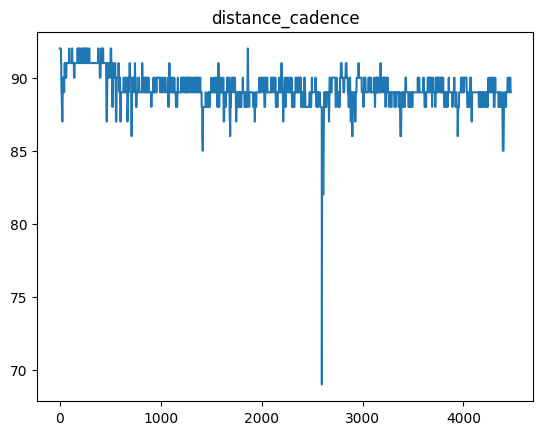

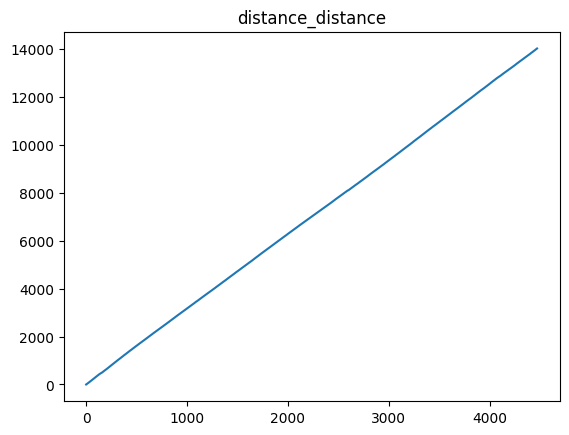

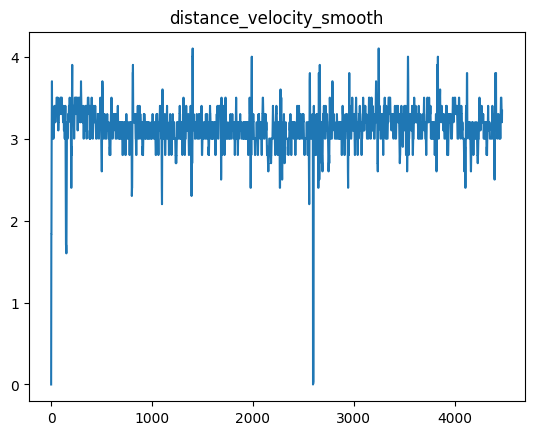

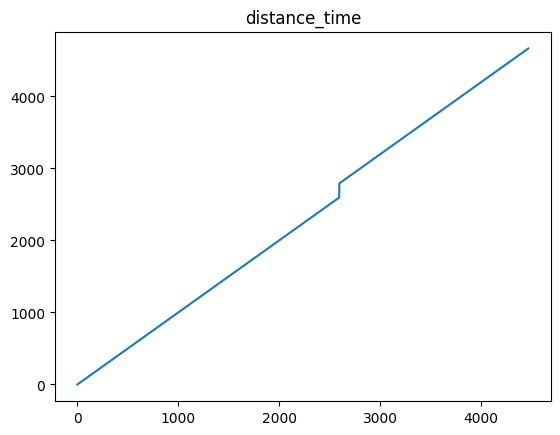

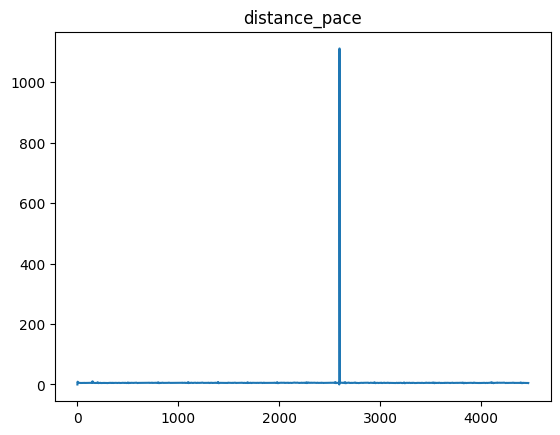

In [33]:
for title, d in data['result'].items():
    plt.plot(d['data'])
    # plt.xlabel("time")
    # plt.ylabel("meter")
    plt.title(f"distance_{title}")
    plt.savefig(f"distance_{title}")
    plt.show()

C:\Users\skyfa\AppData\Local\Temp\ipykernel_31712\3687621618.py:10: RuntimeWarning: divide by zero encountered in divide
  pace = delta_t / delta_d


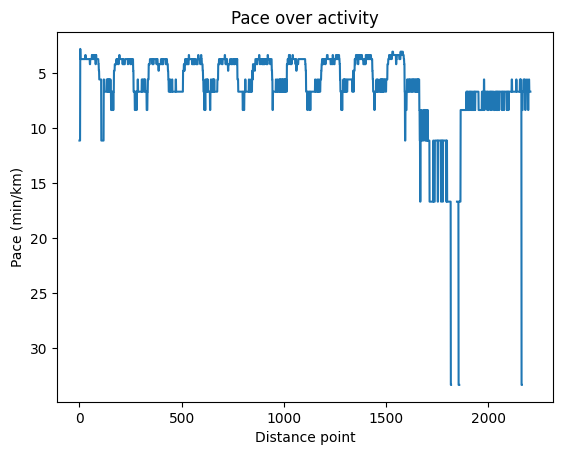

In [22]:
## 거리 시간 기반 pace 계산
distance = np.array(data['result']['distance']['data'])  # meters
time = np.array(data['result']['time']['data'])  # seconds

# 변화량 계산
delta_d = np.diff(distance) / 1000  # km
delta_t = np.diff(time) / 60        # minutes

# 페이스 (분/km)
pace = delta_t / delta_d

# 예외 처리 (0으로 나눔 방지)
pace = np.where(delta_d == 0, None, pace)

plt.plot(data['result']['pace']['data'])
plt.gca().invert_yaxis()  # Y축 뒤집기
plt.ylabel("Pace (min/km)")
plt.xlabel("Distance point")
plt.title("Pace over activity")
plt.show()